# Lab 4.2  Regression with Transformed Variables

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.io import loadmat
import statistics as stats
import matplotlib.pyplot as plt

%matplotlib inline

Make some fake "true" data of river stage, and discharge

In [2]:
h=np.array([11, 12, 13, 14, 15, 17, 20, 25, 30, 50, 70, 75, 80, 100])
h0=10
Qtrue = .2 * (h-h0)**1.67 # discharge

Give the discharge data some normally distributed error to create our "observations" we'll try to fit a rating curve to

In [3]:
sigma_error = .2 * Qtrue # assume errors are normally distributed about truth with 20% standard deviation
Qobs = Qtrue + sigma_error*np.random.normal(0, 1, h.size)

Plot our observations, versus stage (with respect to h0), and then plot our log-transformed values

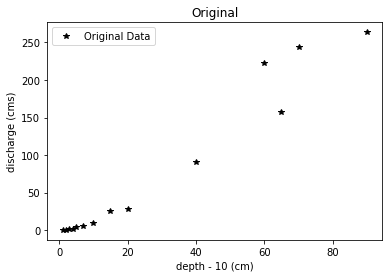

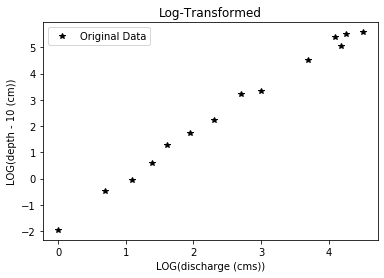

In [4]:
plt.figure()
diff = h-h0
plt.plot(diff, Qobs, 'k*', label='Original Data')
plt.ylabel('discharge (cms)')
plt.xlabel('depth - 10 (cm)')
plt.legend(loc='best')
plt.title('Original')

plt.figure()
diff_logs = np.log(diff)
Qobs_logs = np.log(Qobs)
plt.plot(diff_logs, Qobs_logs, 'k*', label='Original Data')
plt.xlabel('LOG(discharge (cms))')
plt.ylabel('LOG(depth - 10 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed');

Look at the polyfit documentation. What arguments do we need to provide? And what information will it return to us?

In [5]:
np.polyfit?

 Fit the log transformed data to a linear model

In [6]:
P = np.polyfit(diff_logs, Qobs_logs, 1)
print(P)

[ 1.68073155 -1.68313681]


Estimate new values using the model

In [7]:
Yest = np.polyval(P,diff_logs) # Y estimated with this linear model

Plot these estimates, and the true values

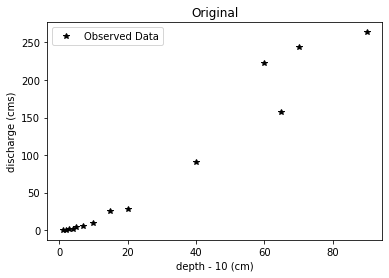

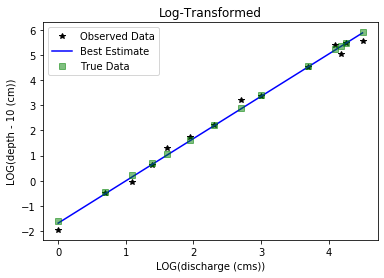

In [8]:
plt.figure()
diff = h-h0
plt.plot(diff, Qobs, 'k*', label='Observed Data')
plt.ylabel('discharge (cms)')
plt.xlabel('depth - 10 (cm)')
plt.legend(loc='best')
plt.title('Original')

Qtrue_logs = np.log(Qtrue)

y_err= Yest-Qobs_logs

plt.figure()
diff_logs = np.log(diff)
Qobs_logs = np.log(Qobs)
plt.plot(diff_logs, Qobs_logs, 'k*', label='Observed Data')
plt.plot(diff_logs,Yest,'b', label='Best Estimate')
plt.plot(diff_logs, Qtrue_logs, 'gs',alpha=0.5, label='True Data')
plt.xlabel('LOG(discharge (cms))')
plt.ylabel('LOG(depth - 10 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed');

In [9]:
# Now, we can find the confidence intervals exactly as we did in lab 3.4
# create series of new test x-values to predict for
x = diff_logs
p_x = np.arange(np.min(x),np.max(x)+1,1)

# now calculate confidence intervals for new test x-series
mean_x = np.mean(x)                 # mean of x
n = x.size                          # number of samples in origional fit
t = st.t.ppf(0.975, n-2)             # appropriate t value (for n, and two tailed 95%)        
sse = np.sum(y_err**2)              # sum of the squares of the residuals
st_err = np.sqrt(sse/(n-2))         # standard error

sigma = st_err**2 * (1 + 1/n + ( ( n*(p_x-mean_x)**2 ) / ( n*np.sum(x**2) - np.sum(x)**2 ) ) )
confs = t * np.sqrt(sigma)

# now predict y based on test x-values, using the coefficients we calculated above
p_y = P[0]*p_x+P[1]
# get lower and upper confidence limits based on predicted y and confidence intervals
lower = p_y - np.abs(confs)
upper = p_y + np.abs(confs)

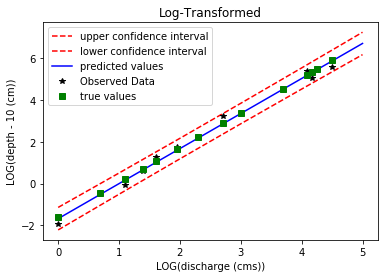

In [10]:
plt.plot(p_x,lower,'r--', label='upper confidence interval')
plt.plot(p_x,upper,'r--', label='lower confidence interval')
plt.plot(p_x,p_y,'b', label='predicted values')
plt.plot(diff_logs, Qobs_logs, 'k*', label='Observed Data')
plt.plot(diff_logs, Qtrue_logs, 'gs', label='true values')
plt.xlabel('LOG(discharge (cms))')
plt.ylabel('LOG(depth - 10 (cm))');
plt.legend(loc='best')
plt.title('Log-Transformed');

(0, 100)

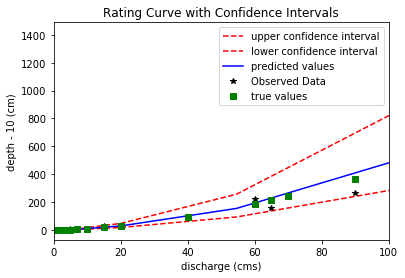

In [11]:
# The final step is to un-transform all of the data in the above graph.
plt.plot(np.exp(p_x),np.exp(lower),'r--', label='upper confidence interval')
plt.plot(np.exp(p_x),np.exp(upper),'r--', label='lower confidence interval')
plt.plot(np.exp(p_x),np.exp(p_y),'b', label='predicted values')
plt.plot(np.exp(diff_logs), np.exp(Qobs_logs), 'k*', label='Observed Data')
plt.plot(np.exp(diff_logs), np.exp(Qtrue_logs), 'gs', label='true values')
plt.xlabel('discharge (cms)')
plt.ylabel('depth - 10 (cm)');
plt.legend(loc='best')
plt.title('Rating Curve with Confidence Intervals');
axes = plt.gca() 
axes.set_xlim([0,100])


### What do you think about our confidence in our rating curve at flood-level flows?